In [7]:
from pathlib import Path
import torch
import pandas as pd
import stat
import numbers
import pydicom
import numpy as np
from tqdm import tqdm
from collections import Counter
import re
import os
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import json
import seaborn as sns

In [11]:
sns.set(style="whitegrid", font_scale=1.2)

In [2]:
Path().resolve()

PosixPath('/home/buehlern/Documents/Masterarbeit/notebooks')

In [3]:
df_loc = Path('../data/df_min.pkl')
df = pd.read_pickle(df_loc)

In [4]:
df

,patientid,path,pixelarr_shape,inverted,bodypart,fracture,foreignmaterial
0,-0XIAZI2mBM,/home/buehlern/neocortex-nas/shared/Skelett/BW...,"(2947, 1140)",False,tspine,NaN,NaN
1,-0XIAZI2mBM,/home/buehlern/neocortex-nas/shared/Skelett/BW...,"(3001, 2220)",False,tspine,NaN,NaN
2,-1qIJOjCmUA,/home/buehlern/neocortex-nas/shared/Skelett/BW...,"(2903, 1267)",False,tspine,NaN,NaN
3,-1qIJOjCmUA,/home/buehlern/neocortex-nas/shared/Skelett/BW...,"(2622, 1132)",False,tspine,NaN,NaN
4,-1qIJOjCmUA,/home/buehlern/neocortex-nas/shared/Skelett/BW...,"(2834, 1261)",False,tspine,NaN,NaN
...,...,...,...,...,...,...,...
639872,zzYDEupARTA,/home/buehlern/neocortex-nas/shared/Skelett/SG...,"(3056, 1250)",True,ankle,NaN,NaN
639873,zztrIVB0lEM,/home/buehlern/neocortex-nas/shared/Skelett/SG...,"(1654, 960)",False,ankle,NaN,NaN
639874,zztrIVB0lEM,/home/buehlern/neocortex-nas/shared/Skelett/SG...,"(1485, 831)",False,ankle,NaN,NaN
639875,zzuYHa4Yo7I,/home/buehlern/neocortex-nas/shared/Skelett/SG...,"(1791, 880)",False,ankle,NaN,NaN


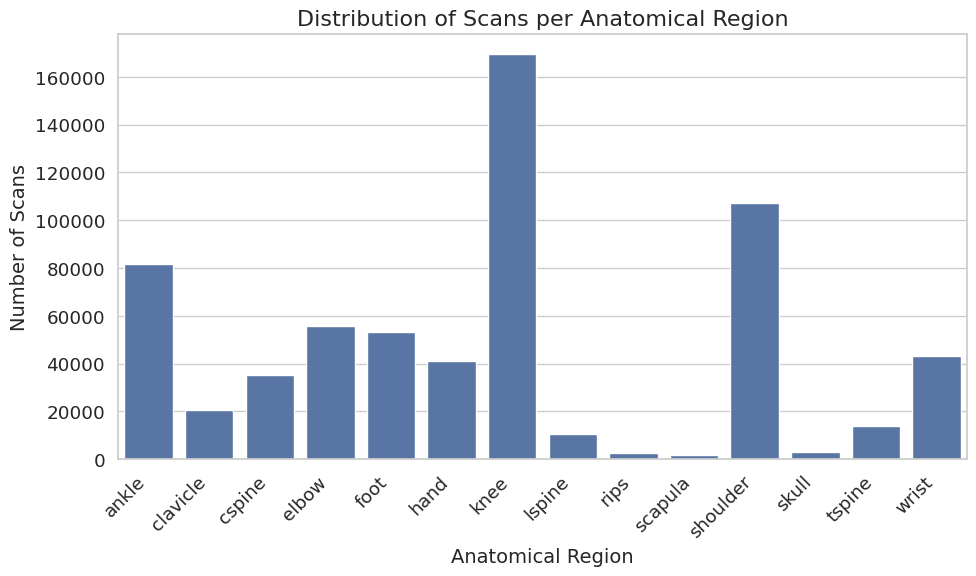

In [13]:
bodypart_counts = df['bodypart'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=bodypart_counts.index, y=bodypart_counts.values)
plt.xlabel("Anatomical Region", fontsize=14)
plt.ylabel("Number of Scans", fontsize=14)
plt.title("Distribution of Scans per Anatomical Region", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("export/bodypart_histogram.png", dpi=300)
plt.show()

x cutoff points: [ 246. 1543. 2002. 2438. 3072.]
y cutoff points: [ 219. 1117. 1417. 1852. 3071.]


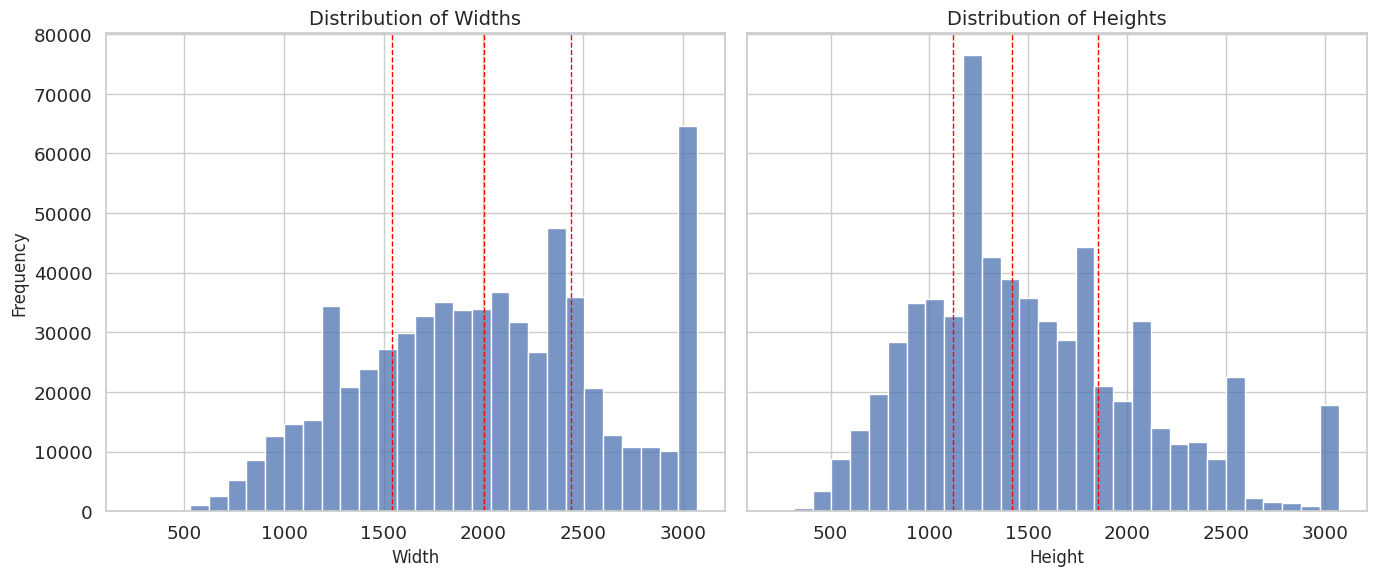

In [30]:
df[['x', 'y']] = df['pixelarr_shape'].tolist()

x_bins = np.percentile(df['x'], [0, 25, 50, 75, 100])
y_bins = np.percentile(df['y'], [0, 25, 50, 75, 100])

print("x cutoff points:", x_bins)
print("y cutoff points:", y_bins)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Width histogram
sns.histplot(df['x'], bins=30, kde=False, ax=axes[0])
axes[0].set_title("Distribution of Widths", fontsize=14)
axes[0].set_xlabel("Width", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

for q in x_bins[1:-1]:
    axes[0].axvline(q, linestyle='--', color='red', linewidth=1)

# Height histogram
sns.histplot(df['y'], bins=30, kde=False, ax=axes[1])
axes[1].set_title("Distribution of Heights", fontsize=14)
axes[1].set_xlabel("Height", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

for q in y_bins[1:-1]:
    axes[1].axvline(q, linestyle='--', color='red', linewidth=1)

plt.tight_layout()
plt.savefig("export/resolution_histogram.png", dpi=300)
plt.show()